# 1. Astropy Coordinates

The [Messier Objects](https://en.wikipedia.org/wiki/Messier_object) are a set of 110 astronomical objects catalogued by the French astronomer Charles Messier first back in 1774. The catalogue consists of a diverse range of astronomical objects, from star clusters and nebulae to galaxies. Messier objects are extremely popular targets for amateur astronomers. Back on campus, we organised a lot of Messier Marathons in which you would have to identify and locate as many Messiers in a fixed time. The following question is inspired by **SnT Code** - probably the most popular and fun event during your stay on campus. Below is a picture of [M42 (Orion Nebula)](https://en.wikipedia.org/wiki/Orion_Nebula) for absolutely no reason. 

<p align="centre">
<img src="../assets/img4.jpg" width="300">
</p>
    


## Identify the Messier

You are given the location (RA, DEC) of stars in 2 different globular clusters and based on the data given you have to identify the Messier in the question using your detective skills and the techniques that you have learnt in the previous modules.

<p align="centre">
<img src="../assets/img5.png" width="350">
</p>


### Guidelines:

> 1. The mean of Right Ascension and Declination can be approximated as the actual location of the Globular Cluster.
> 2. Use `SkyCoord.from_name` to prepare a catalog of Messiers with their coordinates (and save it in a CSV file).
> 3. Employ the crossmatching techniques that you learnt to find out the nearest Messier to your target cluster. You may take the offset radius to be 30 arcsec. 

**Note:** Hints will be released at 12:00 A.M 13th June (Sunday). 

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
cluster = pd.read_csv("Clusters.csv")
location = (cluster['RA'] + cluster['DEC'])/2
data = []

for i in range (1,111):
    messier = []
    Messier = str("Messier") + str(i)
    messier.append(Messier)
    coords = SkyCoord.from_name(Messier)
    messier.append(coords.ra.degree)
    messier.append(coords.dec.degree)
    data.append(messier)

df = pd.DataFrame(data, columns = ["Messiers", "RA", "DEC"])
df.to_csv("Messier.csv", index = None)
data1 = cluster[cluster['Cluster']==1]
data2 = cluster[cluster['Cluster']==2]
RA1 = np.array(data1["RA"])
RA2 = np.array(data2["RA"])
DEC1 = np.array(data1["DEC"])
DEC2 = np.array(data2["DEC"])
RA1avg = np.average(RA1)
RA2avg = np.average(RA2)
DEC1avg = np.average(DEC1)
DEC2avg = np.average(DEC2)

print("Location of Globular cluster 1 : %f, %f"%(RA1avg, DEC1avg))
print("Location of Globular cluster 2 : %f, %f"%(RA2avg, DEC2avg))

messier_ra = np.asarray(df["RA"])
messier_dec = np.asarray(df["DEC"])
c1 = SkyCoord(ra = RA1avg*u.degree, dec = DEC1avg*u.degree, frame = 'icrs')
c2 = SkyCoord(ra = RA2avg*u.degree, dec = DEC2avg*u.degree, frame = 'icrs')

catalogue = SkyCoord(ra = messier_ra*u.degree, dec = messier_dec*u.degree, frame = 'icrs')

idx1,d2d1,d3d1 = (c1).match_to_catalog_sky(catalogue)
if d2d1.value < (30/3600):
    print("Closest Messier to Globular cluster 1 is : Messier", idx1 + 1)    
else:
    print("No match found in specified limits")
    
idx2,d2d2,d3d2 = (c2).match_to_catalog_sky(catalogue)
if d2d2.value < (30/3600):
    print("Closest Messier to Globular cluster 2 is : Messier", idx2 + 1)
else:
    print("No match found in specified limits")

Location of Globular cluster 1 : 279.100248, -23.901916
Location of Globular cluster 2 : 158.833234, 65.754445
Closest Messier to Globular cluster 1 is : Messier 22
No match found in specified limits


# 2. Scipy

The file GW_data_file.csv contains the timeseries and the frequency data of the first Gravitational Wave detection made by LIGO, GW150914.
The data file has 3 arrays:
a) the strain data, which is filtered, so you don't have to worry about noises,
b) the frequency of the data at that particular time (Not exactly),
c) the time.

**Hint**: You can import it using this code:

```python
data, freq, time = np.loadtxt('GW_data_file.csv',delimiter=',')
```

This will automatically give you the data, frequency and the time arrays.

Your first task is to make two plots:
(a) strain vs time
(b) frequency vs time.

You should notice something weird about the frequency plot. Why is it weird?

Find out the indexes of [zero-crossings](https://en.wikipedia.org/wiki/Zero_crossing). Use the frequency and the time at these zero-crossings to make a frequency vs time scatter plot.

If you got your results correct, you should see a monotonically increasing function. According to General Relativity, the frequency-time relationship is a power law. Mathematically it is given by:

$$ f_{GW}^{-8/3}(t) = \frac{(8\pi)^{8/3}}{5}\Big(\frac{G\mathcal{M}}{c^{3}}\Big)^{5/3}(t_{c}-t) $$
Where $f_{GW}$ is the frequency of Gravitational Waves, $\mathcal{M}$ is the [chirp mass](https://en.wikipedia.org/wiki/Chirp_mass) of the Binary system and $t_{c}$ is the time of coalescence, the time with the $t=0$ mark in your data. Note that this equation is applicable only for $t < t_{c}$, as after this is the ringdown where the process is highly non-linear and it is not possible to predict the equation followed by the frequency.

Your task is to take points with frequency higher than 50 Hz until $t_{c}$ and fit a curve to get the chirp mass of the system

> _*You can find more about the event in this [paper](https://arxiv.org/pdf/1608.01940.pdf).*_

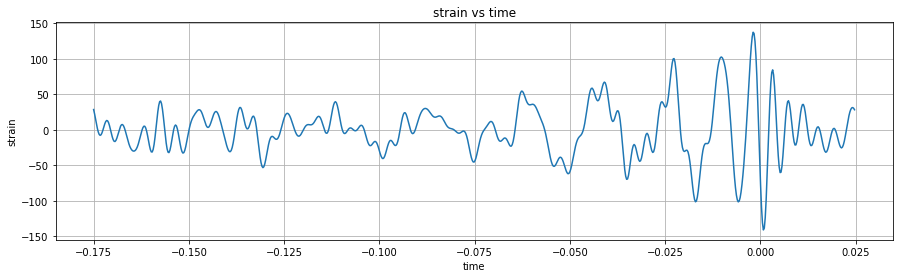

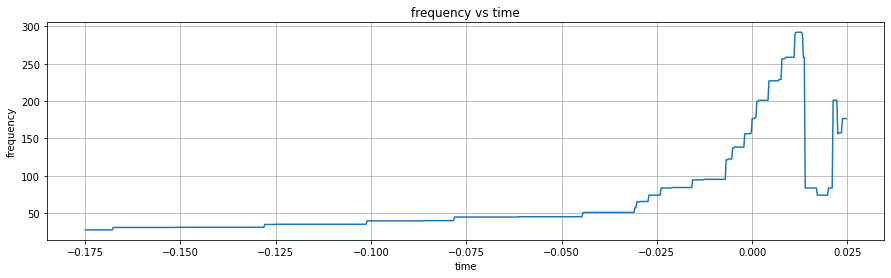

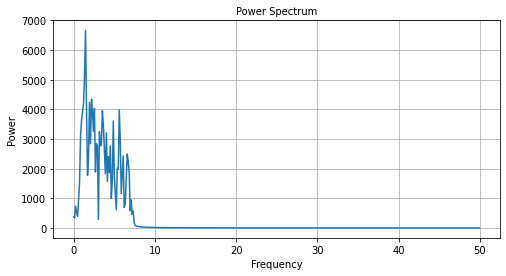

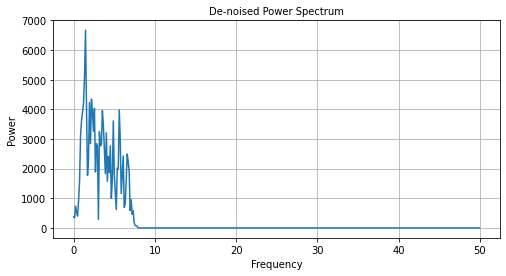

[3.85210716e+14]


In [25]:
import numpy as np
from scipy.optimize import curve_fit as cf
import scipy.constants as sc
import matplotlib.pyplot as plt

#importing the data
data, freq, time = np.loadtxt('GW_data_file.csv',delimiter=',')

#strain vs time
plt.figure(figsize = (15, 4))
plt.plot(time, data)
plt.grid()
plt.xlabel("time")
plt.ylabel("strain")
plt.title("strain vs time")

#frequency vs time
plt.figure(figsize = (15, 4))
plt.plot(time, freq)
plt.grid
plt.xlabel("time")
plt.ylabel("frequency")
plt.grid()
plt.title("frequency vs time")

power = np.fft.rfft(data)
freq=np.fft.rfftfreq(len(data),0.01)
plt.figure(figsize = (8,4))
plt.plot(freq,np.abs(power))
plt.xlabel("Frequency",size = 10)
plt.ylabel("Power",size = 10)
plt.title("Power Spectrum",size = 10)
plt.grid()
plt.show()

indices=np.where(np.abs(power) < 50) 
power[indices]=0
plt.figure(figsize=(8,4))
plt.plot(freq,np.abs(power))
plt.xlabel("Frequency",size=10)
plt.ylabel("Power",size=10)
plt.title("De-noised Power Spectrum",size=10)
plt.grid()
plt.show()

def f(t, m):
    tc = 0
    return -np.log(8*np.pi/3) - (5/8)*np.log(sc.G*m/sc.c**3) - (3/8)*np.log(tc-t)
   
p_opt, p_cov = cf(f, time[indices], freq[indices])
print(p_opt)

# 3. Time-series Analysis

> Go to the OGLE database mentioned in the tutorial notebook. Follow the query procedure and choose any Cepheid of your choice. Download it's relevant data available that is, data for which the plot has been shown on the webpage. 
Analyse the data to determine the time period and thus phase fold the given data.

<p align="centre">
<img src="../assets/img6.png" width="300">
</p>
    

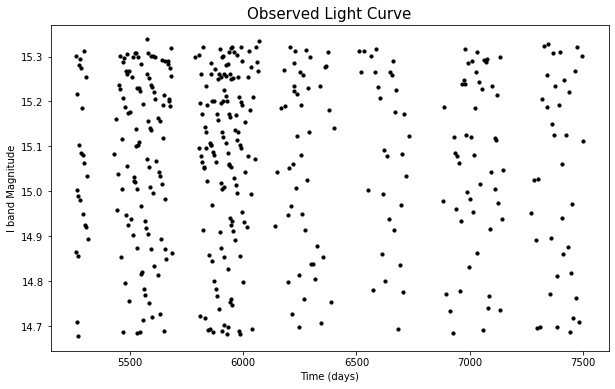

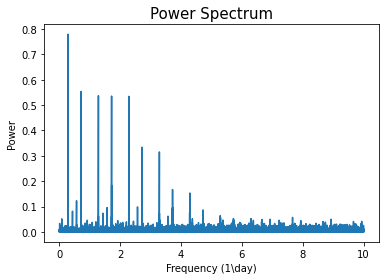

3.5230138291279682


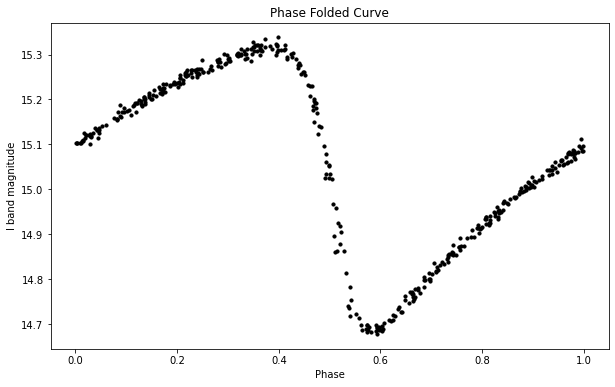

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle

time, I_mag, e_I_mag = np.genfromtxt("OGLE-LMC-CEP-0027.dat", unpack=True)
plt.figure(figsize=(10,6))
plt.scatter(time, I_mag,c='k', s=10)
plt.xlabel("Time (days)")
plt.ylabel("I band Magnitude")
plt.title("Observed Light Curve",size=15)
plt.show()

frequency, power = LombScargle(time, I_mag, e_I_mag).autopower(minimum_frequency=0.001, maximum_frequency=10)

plt.plot(frequency, power)
plt.xlabel('Frequency (1\day)')
plt.ylabel('Power')
plt.title("Power Spectrum", size=15)
plt.show()

period=1/frequency[np.argmax(power)]
print(period)

phase = np.remainder(time,period)/period
plt.figure(figsize=(10,6))
plt.scatter(phase,I_mag,c='k',s=10)
plt.xlabel("Phase")
plt.ylabel("I band magnitude")
plt.title("Phase Folded Curve")
plt.show()